## Common Error Messages

Hi guys, in this lecture we shall be looking at a couple of Python's error messages you are likely to see when writing scripts.  We shall also cover a few fixes for said problems.

## Syntax Error

Syntax Error's occur when you have written something that Python violates the grammatical rules of Python. Common causes are:

* Bad Names
* Typos (e.g missing colons, brackets, etc)

#### Bad variable names...

In [5]:
3ds = 100  # cannot start names with numbers. To fix: three_d_s = 100, or nintendo3ds = 100
list = [1,2,3] # "list" is a special keyword in Python, cannot use it as a name. To fix: a_list = [1,2,3]

SyntaxError: invalid syntax (<ipython-input-5-ce41fb3bae79>, line 1)

#### Typo's

Typo's are probably the main cause of syntax errors, check that you haven't missed things like brackets, colons, comma's and so on. A few examples...

In [ ]:
lst = [1 2 3 4] # No comma's between items. Fix is: lst = [1, 2, 3, 4]
10 + 12) * (4 + 3) # missing brackets. Fix is: (10 + 12) * (4 + 3) 

## Name Errors

Name errors occur when something has not been defined. Common causes are:

* Typo's
* Confusing scope
* Forgetting quote marks when dealing with strings
* Confusing == with =

#### Typo's

When it comes to names, its easy to define it somewhere and then when you try to call it you misspell it or something. Also remember Python is case-sensitive (e.g "a" != "A"). In these cases the the fix is obvious, go in and correct the typo!

#### Strings without quotes are Names....

As the title says, strings that are not encased in quotation marks are not strings. When Python sees "Hello" Python knows that is a string, when it sees Hello Python looks for a variable named Hello. 

In [ ]:
greeting = hello # Fix is: greeting = "hello"

#### "==" is not "="

For experienced users, this is merely another type of typo. However, for beginners this error is sometimes more indicative of a more serious and fundamental misunderstanding.

Essentially the error here would be confusing assignment ("=") with *asking* if a equals b ("=="). If you do not understand this crucial distinction I'd strongly recommend revisiting the lectures on assignment and logic. 

Here is a simple example:

In [1]:
a == 8  # NameError; a is not defined!
print(a)

# The Fix: 
a = 8
print(a)

NameError: name 'a' is not defined

#### Issues with Scoping

As I've mentioned in previous lectures, Python works in code "blocks" and such blocks have their own space to play with. Within that space variables can be defined and those variables are not affected (or even known) by other parts of the code. Common fixes include changing indentation levels, or saving variables to other names spaces. For example:

In [ ]:
def func():
    t = 35
print(t)

# Possible Solutions:

# Fix 1: Change indentation level of the print statement. 
def func():
    t = 35
    print(t)

# Fix 2: Save 't' in another namespace.
def func()
    t = 35
    return t

t = func()
print(t)

## Type Errors

Suppose you have an object of Type ‘X’ (Int, str, ...) and some sort of operation ‘Y’ (multiplication, concatenation). The Type error happens when operation ‘Y’ is not compatible with object Type ‘X’. 

For example: A / B makes sense when A and B are floats/integers, but Python does not know what it is to divide a list by a list nor does it understand what you want to do when you try to divide the string "cat" with the set '{1, 2, 3}' or something. In such cases you get a type error. 

In [ ]:
10 / 2        # works!
"abc" / "de"  # error!

Common causes:

* Another part of the code is misbehaving!
* Misunderstanding properties of data-types and/or how thier methods work.
* Oversights...

#### Problems elsewhere...

If you receive a type error, in may cases the *direct cause* usually isn't the problem, rather, the problem happened much earlier and you are just finding out about it now. What I mean is, everyone knows you cannot divide strings by strings and so its unlikely you wrote a piece of code to do just that. Rather, some other bit of code returned strings instead of integers and that mistake gets passed on to the next function. 

For example...

In [1]:
# Building a calculator !
print("Welcome to my amazing calculation machine 1.0!",
      "Give me a two numbers and I add them together and tell you if the result is a perfect square", sep="\n")

a = input("please enter a number ")
b = input("and another number ")

def add(a, b):
    return a + b

def is_square(x):
    import math
    return math.sqrt(x).isinteger()

x = (add(a, b))
print(is_square(x))

Welcome to my amazing calculation machine 1.0!
Give me a two numbers and I add them together and tell you if the result is a perfect square
please enter a number 89
and another number 90


TypeError: must be real number, not str

So what this code is trying to do is simple; the user enters two numbers(A, B) we add them up and then return True if the result is a perfect square.

However, the code didn't work, and the trace-back is flagging an error with the ‘is_square’ function. In truth however, the problem happened much further back in the code, the is_square function is not our problem. 

Arguably we have a problem with our addition function, for although it works, it also, thanks to operator overloading, works on strings and numbers alike. Instead of receiving an error at this juncture we instead send 'junk' (i.e. the string "22") to the is_square function. 

But we can go back even further in our analysis and ask:

> "Why did our addition function receive strings as input in the first place?"

The actual source of this error is forgetting that the input function returns strings, and we did not convert those strings to integers. This error then trickled all the way through the rest of the program until we finally receive a type error far removed from the actual problem. The solution:

	a = int(input(“{text...}”))

The moral of the story here is that when you receive type errors the *source* of the problem often isn't the bit of code that raised the error. I’d recommend writing print statements at different parts of the code to see if everything is giving the correct output.    

#### Misunderstanding Properties...

Another source of Type errors occurs when you don't fully understand the properties of a particular data-type. Or maybe you misunderstand how a particular object method works. Or maybe you err because you don't understand how something is implemented within Python (at the low-level). The usual remedy for this sort of error is documentation and/or google. 

Here's a simple example:

In [3]:
a_list = [1,2,3,4]
print(a_list[-1])  # so far so good.
a_list[-1] = 99    # Seems legit.
print(a_list)

# And now with strings...

a_string = "abcde"
print(a_string[-1]) # still working...
a_string[-1] = "zztop" # Oh noes! a Type Error
print(a_list)

4
[1, 2, 3, 99]
e


TypeError: 'str' object does not support item assignment

Okay so what happened here? Well, the short answer is that strings in Python support indexing BUT strings are also an *immutable* data-type (google it). Thus, we can't just change the value at index-1 like we can with lists.

The mistake here is assuming that because we can index into strings we can also change individual values but that is simply not the case.

#### Oversights...

Oversights are for the most part just bigger typo's. Oversights happen when you have a bit of code that is generally correct but you missed some minor detail. On the bright side, these issues are usually quick to fix. For example:

In [2]:
l = [1,2,3]

# n*n for each n in list...
for n in range(l):
    l[n] *= l[n]  # *= 2 is shorthand for l[n] = l[n]*2

TypeError: 'list' object cannot be interpreted as an integer

The code above intends to take a list and for each item multiply that item by itself, [1,2,3] ---> [1, 4, 9]. Although probably not the best approach this code is generally correct but for an easy to fix oversight; we can't call range on a list! What we actually meant to do was call range on the length of the list. Like so:

In [ ]:
l = [1,2,3]

for n in range(len(l)):
    l[n] *= l[n]
print(l)

One fixed oversight later, the code works. 

## Index Errors

Index Errors occur when you are trying to index into an object but the index value you have chosen is outside the accepted range. As a quick recap, the accepted range is -length to length -1. For example, if my list has 10 items then I'll receive an index error if I try hand in a number outside the range -10 to 9. 

In [4]:
lst = [0] * 10

print(lst[-10]) # Works!
print(lst[-11]) # Fails

0


IndexError: list index out of range

Of course, the above example is trivial and the fix is obvious. In practice however, your index errors are highly unlikely to be as simple as this. A much more realistic example would be something like creating a game where a character moves through a map; whenever he tries to move outside of the map you get an index error. For example:

In [5]:
def character_movement(x, y):
    """where (x,y) is the position on a 2-d plane"""
    return [("start", (x, y)), 
            ("left", (x -1, y)),("right", (x + 1, y)),
            ("up", (x, y - 1)), ("down", (x, y + 1))]

the_map = [[0, 0, 0],
           [0, 0, 0],
           [0, 0, 0]]

parrot_starting_position = (2, 2)
print(character_movement(*parrot_starting_position)) # *(2,2) does something called "unpacking".

# moving "down" from position 2,2 is 2,3. But 2,3 is out of bounds!
the_map[2][3] # IndexError! 

[('start', (2, 2)), ('left', (1, 2)), ('right', (3, 2)), ('up', (2, 1)), ('down', (2, 3))]


IndexError: list index out of range

Okay so let's talk through this code a bit, basically the movement function takes a position on a 2-d plane and returns a tuple with the movement direction (e.g 'left', 'right', etc) and another tuple stating where that point is in space. For example if I am position (1,1) and I move one square up I am at position (1,0).

For some positions (e.g. those at the edges of the map) some of those points are off the grid. If we take a map of size (2,2) and try to move down from position (2,2) we get an index error. 

They are a few possible fixes, but I think the simplest and most intuitive would be to have a bit of code that says:

> *"hey, try to move in this direction, but if that move takes you outside the map don't bother".* 

The next lecture will teach you a really neat way of doing exactly that.  

### Error Infographic

And finally, I found a decent infographic about this stuff on the wonderful interwebz. Full credit to *Pythonforbiologists.com* for this. 

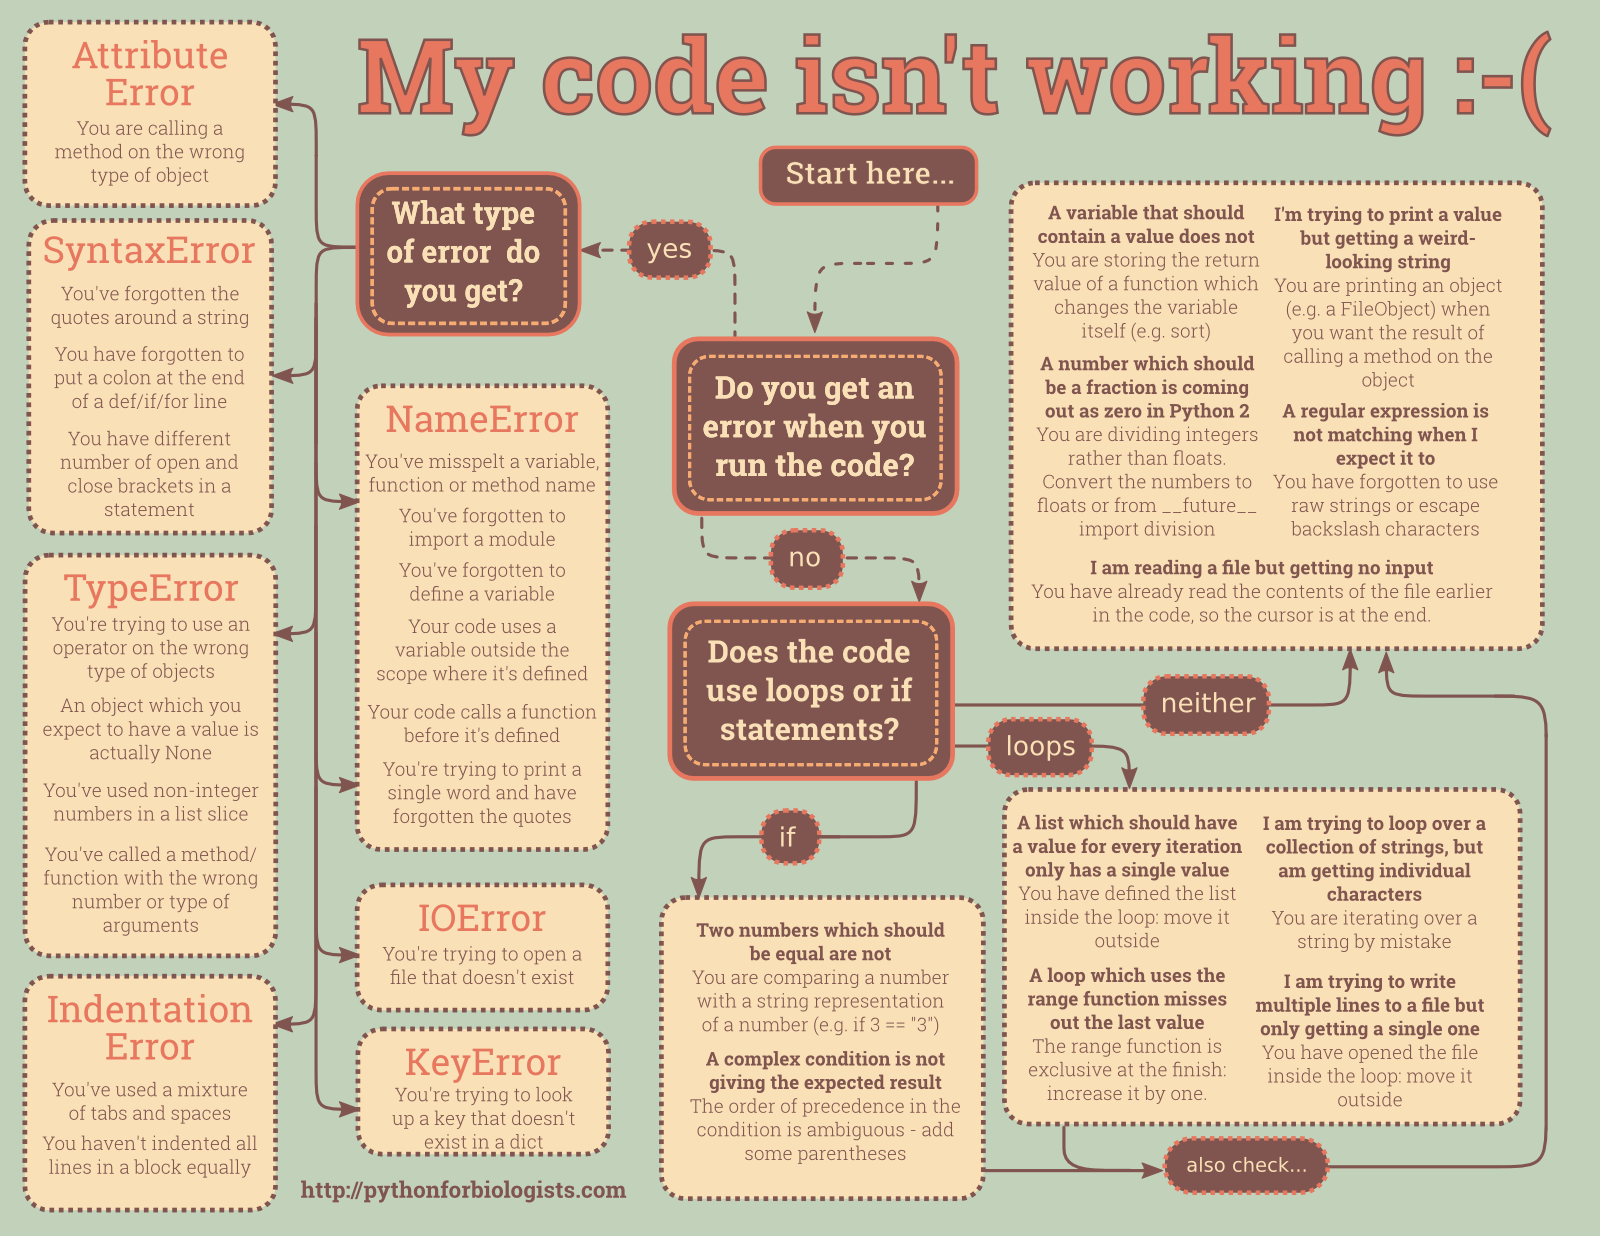